# Importing Data
Initialize loader class for different configuration (normal/alternative)

`Loader()` constructor function
- `data_dir`: specifies the relative path to the data folder, data from each configuration should have a separated folder
- `extra_dir`: specifies the relative path to the extra folder, which contains configuration data for analysis (normally you don't need to change it)
- `image_dir`: contains the two background image

`Loader.load()` loading function must be called
- `learning`: set it to be true to include the learning trial


In [1]:
from analysis import Loader
from analysis import MovementAnalyzer, RotationAnalyzer

loader = Loader(data_dir="data/1", extra_dir="extra", image_dir="images")
loader.load(learning=True)

loader2 = Loader(data_dir='data/2')
loader2.load(learning=True, alternative=True)


Rotation file rotation.csv missing for 1031_T3
Ignore if you don't need to process rotation data


# Movement Analysis

`MovementAnalyzer()`
- it takes loader as a parameter

`MovementAnalyzer.plot_all()` plot all the movement of a single participant
- `subject`: get the subject by calling `loader.subjects[THE_NAME]`
- `start`: the first trial to plot (inclusive)
- `end`: the last trial to plot (inclusive)
- `reverse_divide`: set it to True so the efficiency is calculated by shortest / actual movement path

`MovementAnalyzer.calculate_efficiency_for_one`: calculate the efficiency of a single participant
- `subject`: get the subject by calling `loader.subjects[THE_NAME]`
- `start`: the first trial to plot (inclusive)
- `end`: the last trial to plot (inclusive)
- `reverse_divide`: set it to True so the efficiency is calculated by shortest / actual movement path


`MovementAnalyzer.calculate_efficiency_for_all`: calculate the efficiency of all the participants
- `start`: the first trial to plot (inclusive)
- `end`: the last trial to plot (inclusive)
- `reverse_divide`: set it to True so the efficiency is calculated by shortest / actual movement path
- `excluding`: set it with a list of participant name (folder name) you want to exclude



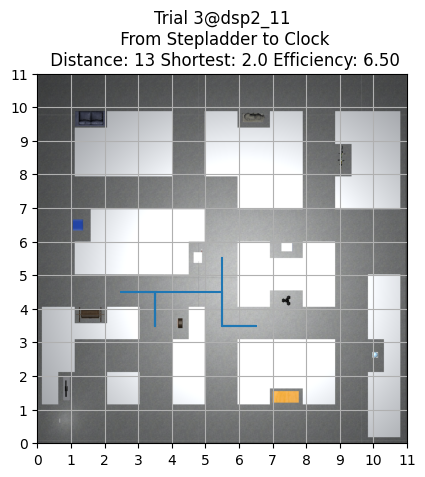

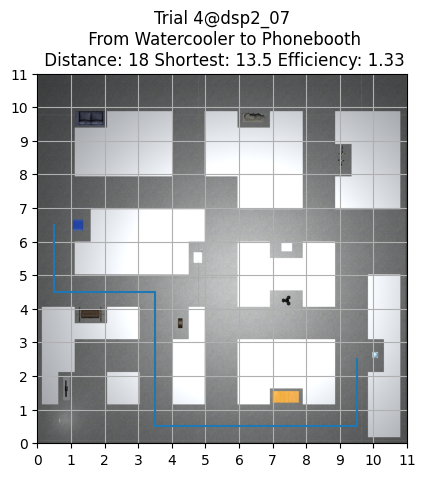

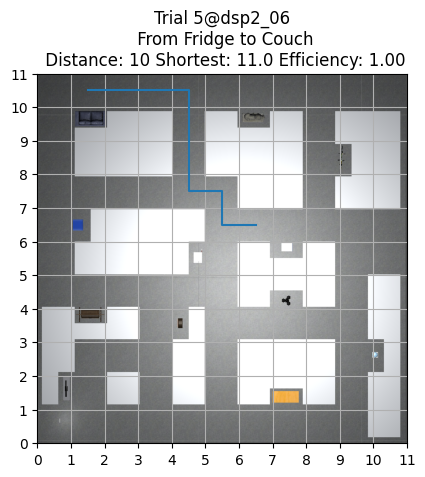

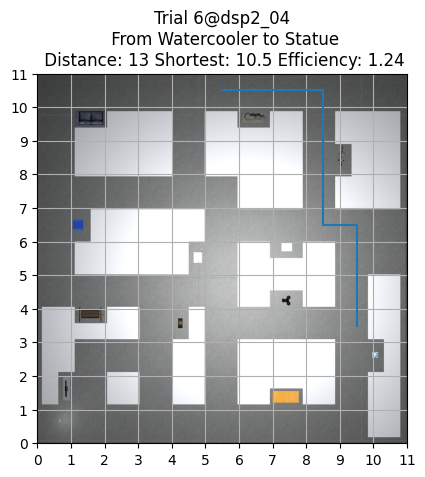

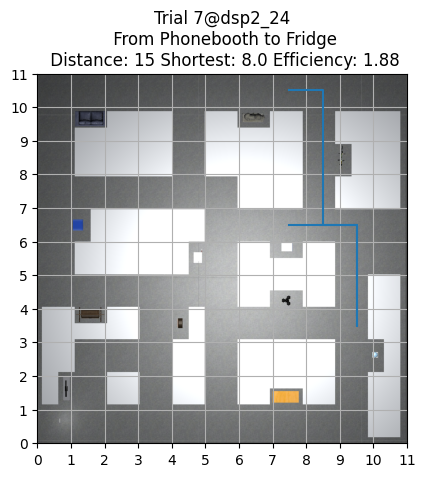

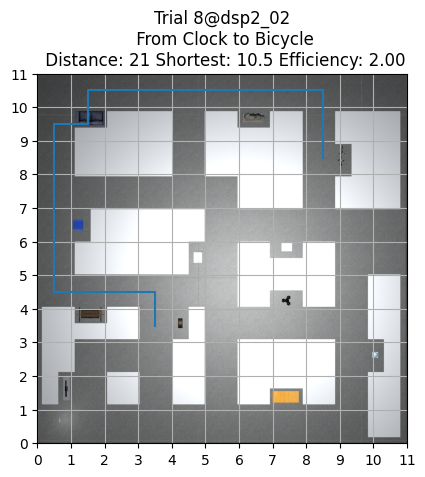

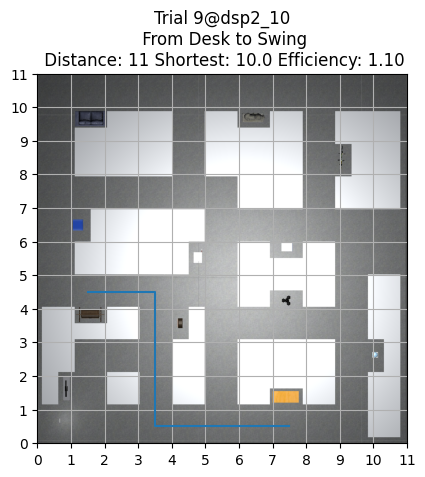

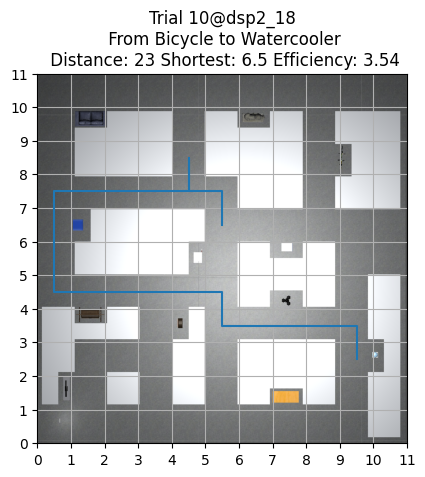

0.15384615384615385
{3: 0.15384615384615385, 4: 0.75, 5: 1, 6: 0.8076923076923077, 7: 0.5333333333333333, 8: 0.5, 9: 0.9090909090909091, 10: 0.2826086956521739}


In [2]:

movement_analyzer = MovementAnalyzer(loader2)

subject1 = loader2.subjects["1031_T3"]
movement_analyzer.plot_all(subject1, 3, 10)

excluding_names = []
efficiencies = movement_analyzer.calculate_efficiency_for_all(3, 10, reverse_divide=True, excluding=excluding_names)

print(efficiencies["1031_T3"][3])  # Print subject's efficiency on trial 3
print(efficiencies["1031_T3"])  # Print subject's error on all trials


In [3]:
from analysis import Exporter
Exporter.export_efficiency_to_csv(efficiency=efficiencies, file_name="mean.csv", operation="mean")
Exporter.export_efficiency_to_csv(efficiency=efficiencies, file_name="all.csv", operation="all")


Exported to mean.csv
Exported to mean.csv
